In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt




In [2]:
df = pd.read_csv('Space_Corrected.csv')

In [3]:
df = df.iloc[:,2:].copy() #deleting the unnamed columns
df['Country'] = df['Location'].apply(lambda location: location.split(',')[-1])
df['Day']=df['Datum'].apply(lambda datum: datum.split()[0])
df['Month']=df['Datum'].apply(lambda datum: datum.split()[1])
df['Year']=df['Datum'].apply(lambda datum: datum.split()[3]).astype(int)
df.rename(columns={df.columns[5]: 'Rocket'}, inplace=True)
df['Rocket'] = df['Rocket'].fillna(0.0).str.replace(',', '')
df.Rocket = df.Rocket.apply(lambda x: str(x).strip()).astype('float64')
df.drop(['Datum', 'Location', 'Detail'], 1, inplace=True)
df.head()

,Company Name,Status Rocket,Rocket,Status Mission,Country,Day,Month,Year
0,SpaceX,StatusActive,50.00,Success,USA,Fri,Aug,2020
1,CASC,StatusActive,29.75,Success,China,Thu,Aug,2020
2,SpaceX,StatusActive,NaN,Success,USA,Tue,Aug,2020
3,Roscosmos,StatusActive,65.00,Success,Kazakhstan,Thu,Jul,2020
4,ULA,StatusActive,145.00,Success,USA,Thu,Jul,2020


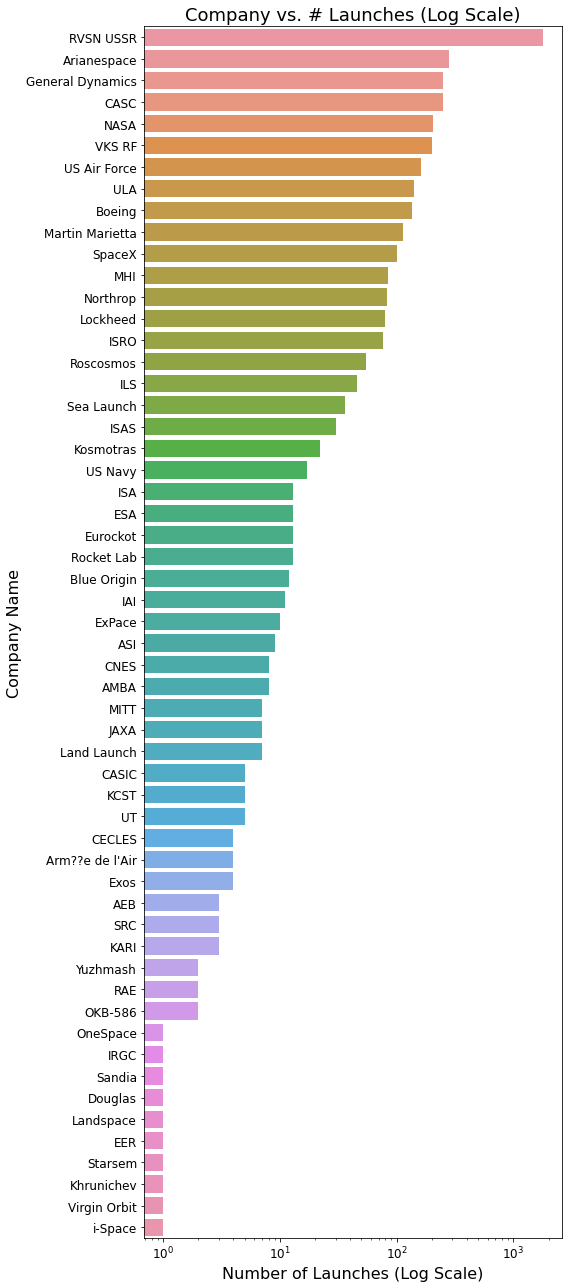

In [5]:
plt.figure(figsize=(8,18))
ax = sns.countplot(y="Company Name", data=df, order=df["Company Name"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Company vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Company Name",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

#Country vs. # Launches

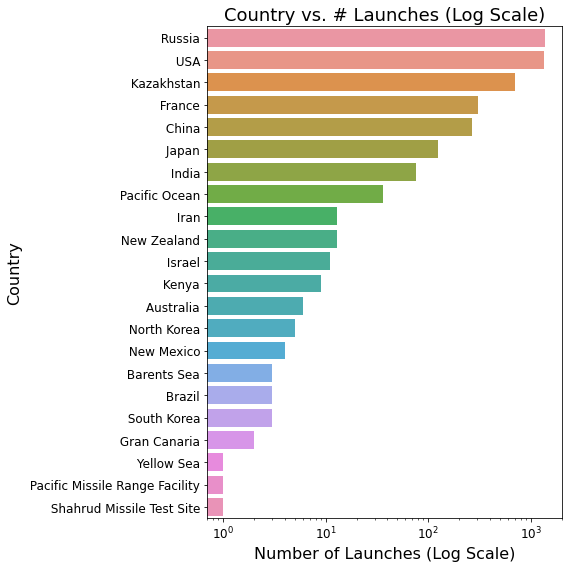

In [6]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [8]:
fig = px.pie(df,names='Status Mission', title='Status of Mission',width=600, height=400)
fig.show()

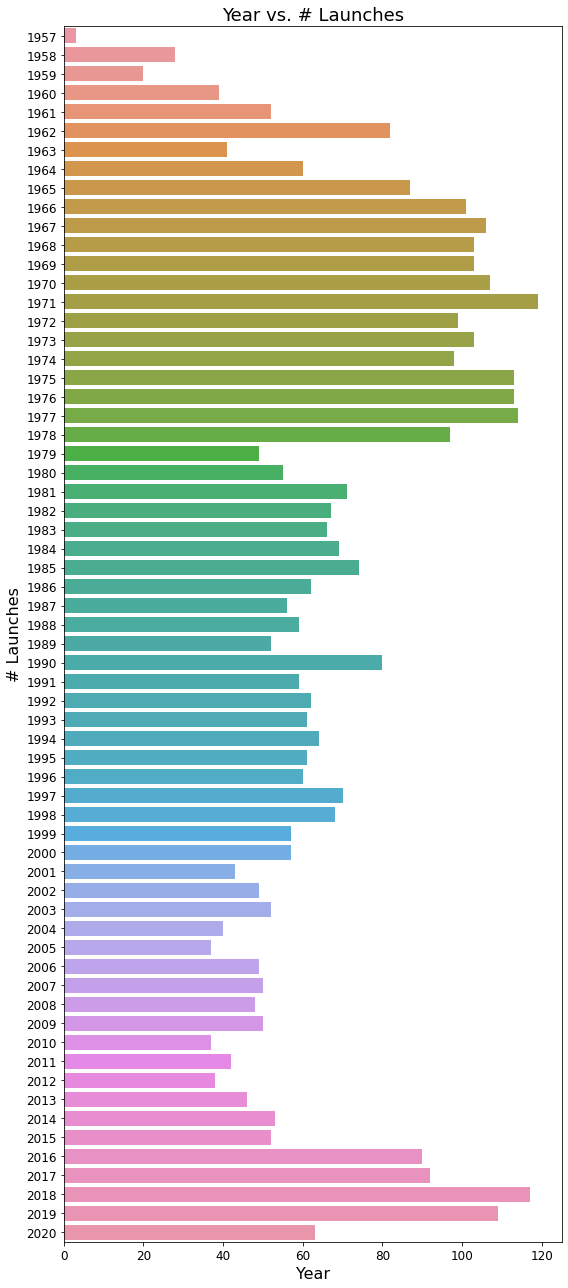

In [9]:
plt.figure(figsize=(8,18))
ax = sns.countplot(y=df['Year'])
ax.axes.set_title("Year vs. # Launches",fontsize=18)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()


In [16]:
ds = df.groupby(['Year', 'Company Name'])['Status Mission'].count().reset_index().sort_values(['Year', 'Status Mission'], ascending=False)
ds = pd.concat([group[1].head(1) for group in ds.groupby(['Year'])])
ds.columns = ['Year', 'Company', 'launches']

fig = px.bar(
    ds, 
    x="Year", 
    y="launches", 
    color='Company', 
    title='Leaders by launches for every year (companies)',
    width=800
)

fig.show()

In [17]:
ds = df[df['Status Mission']=='Success']
ds = ds.groupby(['Year', 'Company Name'])['Status Mission'].count().reset_index().sort_values(['Year', 'Status Mission'], ascending=False)
ds = pd.concat([group[1].head(1) for group in ds.groupby(['Year'])])
ds.columns = ['Year', 'Company', 'launches']

fig = px.bar(
    ds, 
    x="Year", 
    y="launches", 
    color='Company', 
    title='Leaders by success launches for every year (companies)',
    width=800
)

fig.show()

